**Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.**

Answer:

Anomaly Detection is the process of identifying data points or patterns that significantly deviate from normal expected behavior. These observations can indicate critical incidents such as fraud, equipment failure, cyber-attacks, or unusual trends.\
Types of Anomalies


| Type                   | Description                                                               | Example                                                                           |
| ---------------------- | ------------------------------------------------------------------------- | --------------------------------------------------------------------------------- |
| **Point Anomaly**      | A single data instance is abnormal compared to the rest of the dataset    | A transaction of ₹10,00,000 on a debit card where typical spending is ₹3000–₹5000 |
| **Contextual Anomaly** | An observation is abnormal in a specific context such as time or location | Temperature of 25°C is normal in summer, but abnormal in winter                   |
| **Collective Anomaly** | A group of data points collectively behaves abnormally                    | Sudden continuous spike in network traffic indicating a DDoS attack               |


**Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.**

Answer:
| Algorithm                      | Approach                                                                   | Best Use Case                                                                          |
| ------------------------------ | -------------------------------------------------------------------------- | -------------------------------------------------------------------------------------- |
| **Isolation Forest**           | Randomly isolates observations; anomalies require fewer splits             | High-dimensional large datasets (fraud detection, system monitoring)                   |
| **DBSCAN**                     | Density-based clustering; points in low-density regions marked as outliers | Spatial/geographical data, clusters with irregular shapes                              |
| **Local Outlier Factor (LOF)** | Measures local density deviation from neighbors                            | Detecting local anomalies instead of global ones (e.g., credit score, health readings) |


**Question 3: What are the key components of a Time Series? Explain each with one example.**

Answer:
| Component        | Meaning                                 | Example                                 |
| ---------------- | --------------------------------------- | --------------------------------------- |
| **Trend**        | Long-term direction of data             | Increasing yearly air passenger count   |
| **Seasonality**  | Repeating patterns at regular intervals | Hotel bookings high in December and May |
| **Cyclic**       | Patterns occurring irregularly          | Stock market ups and downs              |
| **Random Noise** | Unexpected variations                   | Sudden drop in taxi demand due to rain  |


**Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?**

Answer:

A stationary time series has constant mean, variance, and covariance over time. It does not have trend or seasonality.

How to Test Stationarity


ADF Test (Augmented Dickey-Fuller)

KPSS Test

Visual check using rolling mean & variance

How to Make Data Stationary
| Technique                        | Description                                  |
| -------------------------------- | -------------------------------------------- |
| **Differencing**                 | Subtract previous values from current values |
| **Log transformation**           | Reduces variability                          |
| **Removing trend / seasonality** | Using seasonal decomposition                 |


**Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models.**


Answer:
| Model                    | Structure                         | Used For                        |
| ------------------------ | --------------------------------- | ------------------------------- |
| **AR (Auto-Regressive)** | Depends on past values            | Stock prices                    |
| **MA (Moving Average)**  | Depends on past residual errors   | Noise removal & smoothing       |
| **ARIMA**                | AR + MA + Differencing            | Non-seasonal forecasting        |
| **SARIMA**               | ARIMA with seasonality components | Airline passenger data, weather |
| **SARIMAX**              | SARIMA + external variables       | Energy demand vs weather        |


**Question 6: Load AirPassengers dataset, plot and decompose.**

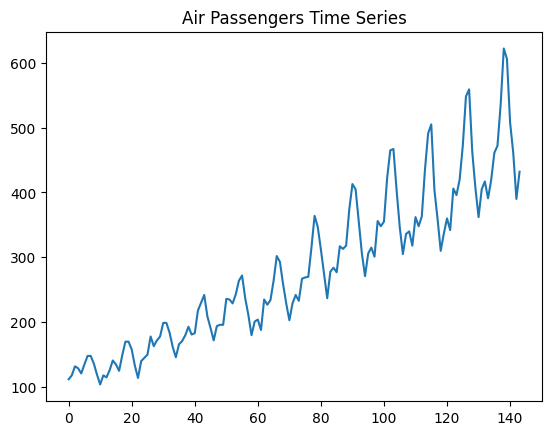

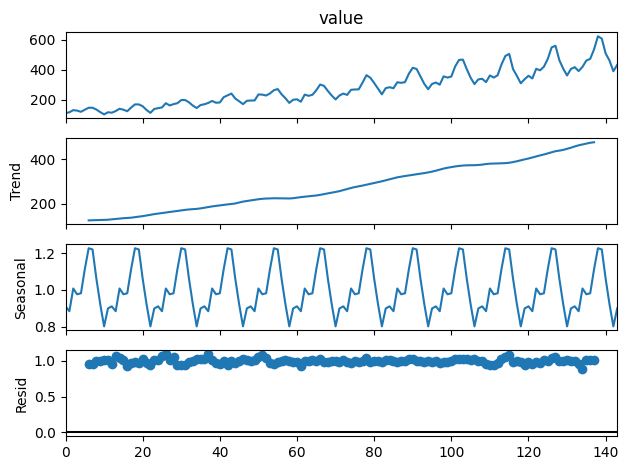

In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

from statsmodels.datasets import get_rdataset
data = get_rdataset("AirPassengers").data
ts = data['value']

plt.plot(ts)
plt.title("Air Passengers Time Series")
plt.show()

result = seasonal_decompose(ts, model='multiplicative', period=12)
result.plot()
plt.show()


**Question 7: Apply Isolation Forest to detect anomalies in NYC Taxi Fare dataset.**

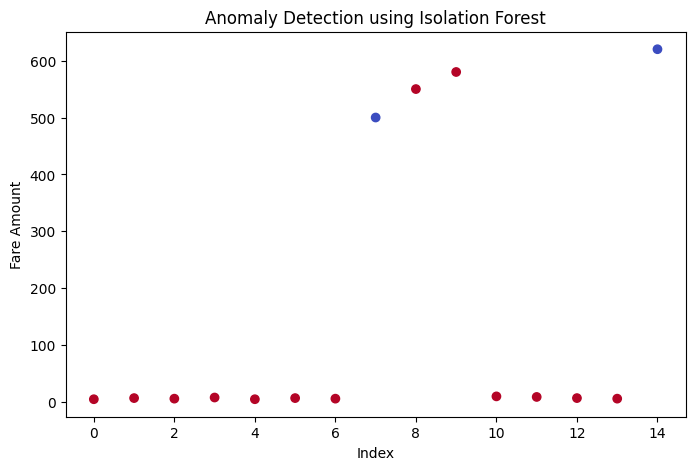

    fare_amount  anomaly
0             5        1
1             7        1
2             6        1
3             8        1
4             5        1
5             7        1
6             6        1
7           500       -1
8           550        1
9           580        1
10           10        1
11            9        1
12            7        1
13            6        1
14          620       -1


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Example synthetic dataset (use real NYC taxi fare if available)
data = {
    'fare_amount': [5, 7, 6, 8, 5, 7, 6, 500, 550, 580, 10, 9, 7, 6, 620]  # anomalies included
}

df = pd.DataFrame(data)

# Apply Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(df[['fare_amount']])

df['anomaly'] = clf.predict(df[['fare_amount']])

# Visualize anomalies
plt.figure(figsize=(8,5))
plt.scatter(df.index, df['fare_amount'], c=df['anomaly'], cmap='coolwarm')
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Index")
plt.ylabel("Fare Amount")
plt.show()

print(df)


**Question 8: Train SARIMA model and forecast 12 months**

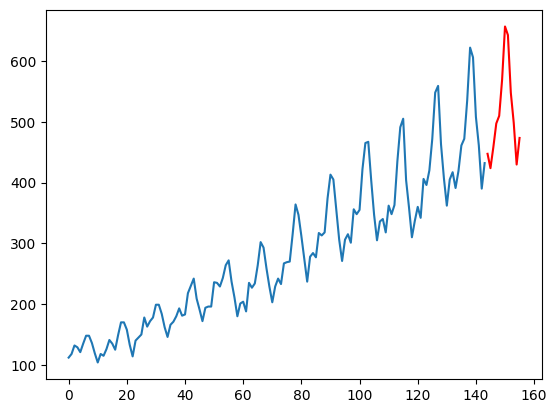

In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

model = SARIMAX(ts, order=(2,1,2), seasonal_order=(1,1,1,12))
fit = model.fit()
pred = fit.predict(len(ts), len(ts)+11)
plt.plot(ts)
plt.plot(pred, color='red')
plt.show()


**Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.**

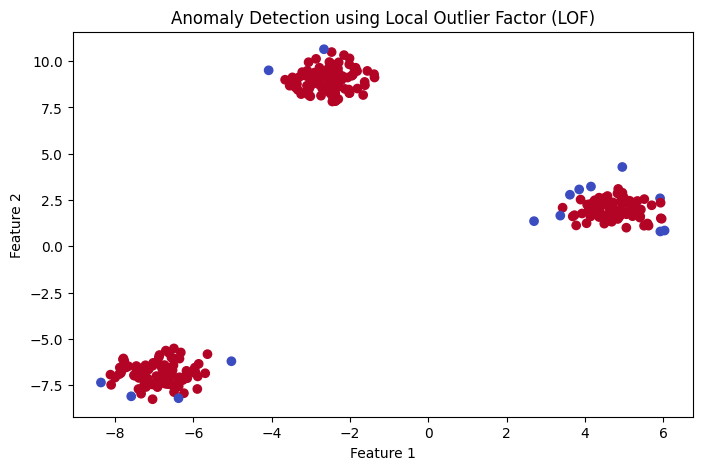

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
labels = lof.fit_predict(X)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm')
plt.title("Anomaly Detection using Local Outlier Factor (LOF)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


**Question 10:You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes.  dataset includes features like timestamp, region, weather conditions, and energy usage. \
Explain your real-time data science workflow: \
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)? \
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)? \
● How would you validate and monitor the performance over time? \
● How would this solution help business decisions or operations?**

Answer:\
Workflow

1. Real-time anomaly detection\
   Use Isolation Forest (works well on streaming) or LOF for local anomalies.

2. Forecasting model\
   Use SARIMAX because external factors (weather, region, holidays) are present.

3. Validation & Performance\

   Split training/testing, use RMSE, MAPE

   Retrain model weekly, monitor drift

4. Business value

   Prevent overload & power outages

   Plan electricity purchase and distribution

   Early warning system for failures